SOURCE: https://www.kaggle.com/code/abhisarangan/ner-using-spacy

# **Named Enitity Recognition**

**Named Enitity Recognition ** is a common problem in NLP dealing with identifying and classifying named entities. 

A named entity is a real life object which has an indentification and can be defined by a name. A place, person, countries or organizations can be a named entity. For example, Microsoft is an organization and Asia is a geographic entity. 

A raw or unstructed data is processed and by using the help of named enitity recognition, one can label and classify the data as different entities. A NER system is developed with the help of linguistic approches and statiscal methods. 

A NER model begins with identifying an entity and categorizes into the most suitable class. 

**Practical Applications of NER: 
**

-- Scanning through large documents and finding people, organizations and locations available. 

-- We could optimize the search by providing the key entities found. 

-- Text Summarization 

**Named Entity Recognition with spaCy:
**

SpaCy is an open source Natural processing library with fast statistical entity recognition system. The methods that are available in SpaCy for NER assigns a label to the text data and classifies the same as defined above. 

Spacy also provides us an option to add arbitrary classes to entity recognition systems and update the model to include new examples. We can train our own data for business-specific needs and prepare the model as necessary.

**spaCy Installation:**

> pip install spacy

> python -m spacy download en_core_web_sm

In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

*en_core_web_sm* is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities.

**Naming convention of the package
**

Type: Capabilities (e.g. core for general-purpose pipeline with tagging, parsing, lemmatization and named entity recognition, or dep for only tagging, parsing and lemmatization).
Genre: Type of text the pipeline is trained on, e.g. web or news.
Size: Package size indicator, sm, md, lg or trf.

Spacy provides predefined models for many languages and they can be found in the URL:
https://spacy.io/models. Predict part-of-speech tags, dependency labels, named entities and more.

When a text is passed into nlp, it goes through each of the pipeline as shown in the image: 

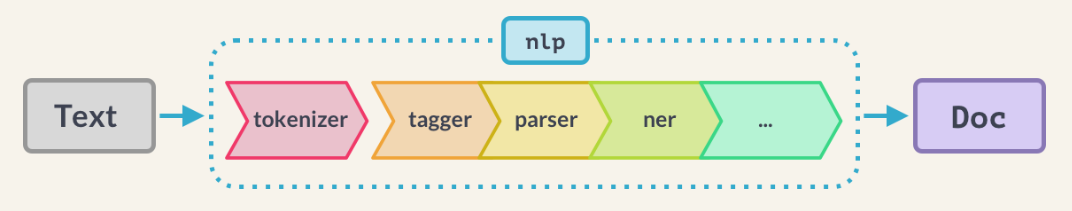

In [2]:
doc = nlp("I live in New York")
for word in doc.ents:
    print(word.text, word.label_)

New York GPE


New York is GPE - Geo-Political Entity

Just in case, if you are wondering what the meaning could be of the label returned. 
We could use the below:

In [3]:
spacy.explain('GPE'), spacy.explain('ORG'),spacy.explain('MONEY') 

('Countries, cities, states',
 'Companies, agencies, institutions, etc.',
 'Monetary values, including unit')

The labels and output are self-explanatory.

**spaCy supports the following entity types:**

PERSON, NORP (nationalities, religious and political groups), FAC (buildings, airports etc.), ORG (organizations), GPE (countries, cities etc.), LOC (mountain ranges, water bodies etc.), PRODUCT (products), EVENT (event names), WORK_OF_ART (books, song titles), LAW (legal document titles), LANGUAGE (named languages), DATE, TIME, PERCENT, MONEY, QUANTITY, ORDINAL and CARDINAL.

**Visualize dependencies**

In [4]:
from spacy import displacy
doc = nlp("I live in New York")


# displacy.render(doc, style="dep", jupyter=False)

# SS: code above did not work for me so I found an alternative
from IPython.display import display, HTML
html = displacy.render(doc, style="dep", jupyter=False)
display(HTML(html))

In [5]:

doc = nlp("Bill Gates and Paul Allen founded Microsoft")

#displacy.render(doc, style="ent")

# SS: code above did not work for me so I found an alternative
html = displacy.render(doc, style="ent", jupyter=False)
display(HTML(html))

In [6]:
doc = nlp("Reaffirming his support to the memecoin, billionaire Elon Musk said that he will keep supporting and buying dogecoin. His support for the cryptocurrency comes amid the recent crypto market meltdown and days after him being hit with $258 billion ‘dogecoin pyramid scheme' lawsuit.")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_, ent.start, ent.ent_id_, ent.label, ent.vector_norm)

Elon Musk 53 62 PERSON 8  380 7.1122327
$258 billion 232 244 MONEY 39  394 5.9285164


* Entity text by using ent.text,
* Starting and ending character of an entity by using ent.start_char and ent.end_char,
* Entity’s index by using ent.start,
* Entity type’s id by using ent.entid,
* Generate vector norm of an entity by using ent.vector_norm.

# Adding new Named Entities in Spacy 
In cases like if we need a new entity in the model, we could follow the steps below to create an entity and include it in the model. 

In [7]:
doc = nlp('Dogecoin is a parody cryptocurrency created by software engineer Billy Markus and Jackson Palmer in 2013.')
for word in doc.ents:
    print(word.text, word.label_)

Dogecoin ORG
Billy Markus PERSON
Jackson Palmer PERSON
2013 DATE


Dogecoin is a cryptocurrency and it is not recognized by spaCy

In [8]:
from spacy.tokens import Span

new_ent = Span(doc, 0, 1, label = "MONEY")
doc.set_ents([new_ent], default = 'unmodified')

In [9]:
for word in doc.ents:
    print(word.text, word.label_)

Dogecoin MONEY
Billy Markus PERSON
Jackson Palmer PERSON
2013 DATE


In [10]:
# displacy.render(doc, style="ent")

# SS: code above did not work for me so I found an alternative
html = displacy.render(doc, style="ent", jupyter=False)
display(HTML(html))



Dogecoin is now considered as MONEY. Just in case if we have numerous cryptocurrencies in our data to be entitled as MONEY, we could find the SPAN and update the label as necessary.

# Adding Named Entities to Matching Spans 
PhraseMatcher is used to identify a series of span in a doc. When the matched spans are identified, we could tag all of them with the corresponding entity. 

In [11]:
doc = nlp('We are launching a new robot at the end of July. According to sales, we may increase the production of robots.')
for ent in doc.ents:
    print(ent.text, ent.label_)

the end of July DATE


This only gives us the end of July as the DATE entity, but we also want the spaCy to identify robot as a Product. Hence, we are using Phrase matcher and adding the label as shown below:

In [12]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

phrase_list = ['robot', 'robots']
phrase_patterns = [nlp(text) for text in phrase_list]

matcher.add('newproduct', None, *phrase_patterns)
matches = matcher(doc)

matches

[(2689272359382549672, 5, 6), (2689272359382549672, 22, 23)]

In [13]:
new_ents = [Span(doc, match[1], match[2], label = 'PRODUCT') for match in matches]
doc.set_ents(new_ents, default = 'unmodified')

In [14]:
for ent in doc.ents:
    print(ent.text, ent.label_)

robot PRODUCT
the end of July DATE
robots PRODUCT


We have added robot as a product to the labels now. 

# How to train a custom NER Model is spaCy

To train the model, we will need relevant data with proper annotations. 
I have used the medical entities dataset here 

Install the spacy-tranformers

> pip install spacy[transformers]

In [15]:
import json
 
with open('example_ner_using_spacy_data_Corona2.json', 'r') as f:
    data = json.load(f)
    
print(data['examples'][0])

{'id': '18c2f619-f102-452f-ab81-d26f7e283ffe', 'content': "While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]", 'metadata': {}, 'annotations': [{'id': '0825a1bf-

We are extracting the text and corresponding annotations and creating a structed data below

In [16]:
training_data = {'classes' : ['MEDICINE', "MEDICALCONDITION", "PATHOGEN"], 'annotations' : []}
for example in data['examples']:
  temp_dict = {}
  temp_dict['text'] = example['content']
  temp_dict['entities'] = []
  for annotation in example['annotations']:
    start = annotation['start']
    end = annotation['end']
    label = annotation['tag_name'].upper()
    temp_dict['entities'].append((start, end, label))
  training_data['annotations'].append(temp_dict)
  
print(training_data['annotations'][0])

{'text': "While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]", 'entities': [(360, 371, 'MEDICINE'), (383, 408, 'MEDICINE'), (104, 112, 'MEDICALCONDITION'), (679,

For the data in text above, we have the labels with their corresponding span. 

In [17]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm

nlp = spacy.blank("en") # load a new spacy model
doc_bin = DocBin()

spaCy uses **DocBin** class for annotated data, so we’ll have to create the DocBin objects for our training examples. This DocBin class efficiently serializes the information from a collection of Doc objects. It is faster and produces smaller data sizes than pickle, and allows the user to deserialize without executing arbitrary Python code.

The indices of some entities overlap. spaCy provides a utility method filter_spans to deal with this.

In [18]:
from spacy.util import filter_spans

for training_example  in tqdm(training_data['annotations']): 
    text = training_example['text']
    labels = training_example['entities']
    doc = nlp.make_doc(text) 
    ents = []
    for start, end, label in labels:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    filtered_ents = filter_spans(ents)
    doc.ents = filtered_ents 
    doc_bin.add(doc)

doc_bin.to_disk("./training_data.spacy") # save the docbin object

  0%|          | 0/31 [00:00<?, ?it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


100%|██████████| 31/31 [00:00<00:00, 976.37it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity


The DocBin saves the Training_Data in Spacy format which we need to train a model. 
Then, We can manually create a config file as per the use case or quickly create a base config on spaCy’s training quickstart page here.

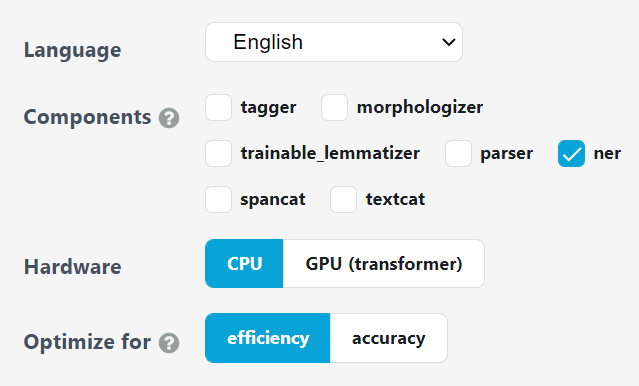

We’ll be working with a base config file using the quickstart page. 
This is an incomplete file with only our custom options, so we’ll have to fill in the rest with the default values. The command below is ran in CMD. 

> python -m spacy init fill-config base_config.cfg config.cfg 

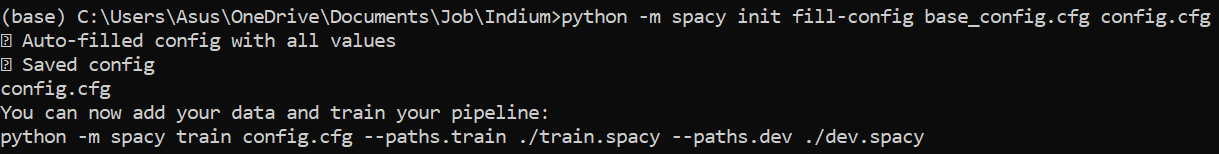

Please make sure that the training data in spacy format is available in the same path before running the line above. This will create a config file in the same directory.  

Now, as we have all that we need to train our model. Let's train the model with the line below: 

> python -m spacy train config.cfg --output ./ --paths.train ./training_data.spacy --paths.dev ./training_data.spacy 

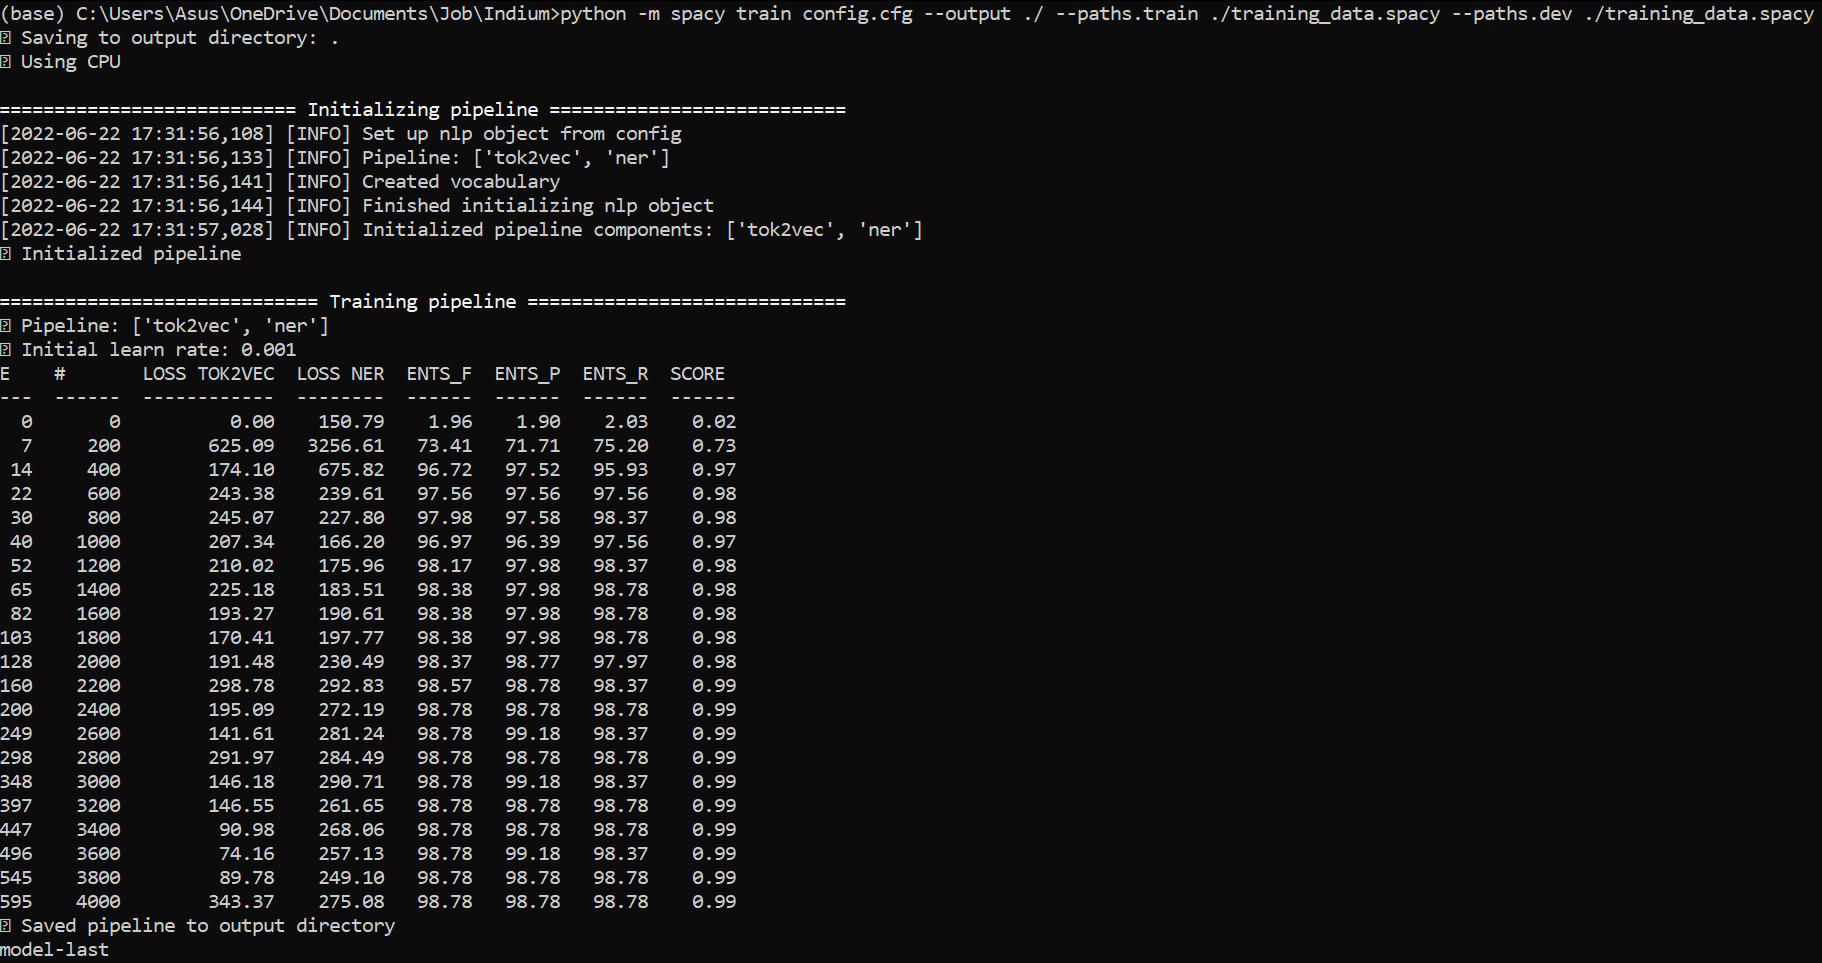 

Let’s load the best-performing model and test it on a piece of text. I had to use Anaconda Prompt to work with the command lines and so the output below was generated in Jupyter notebook. 

> nlp_ner = spacy.load("model-best")

> doc = nlp_ner(training_data['annotations'][0].get('text'))

> spacy.displacy.render(doc, style="ent", options= options, jupyter=True) 

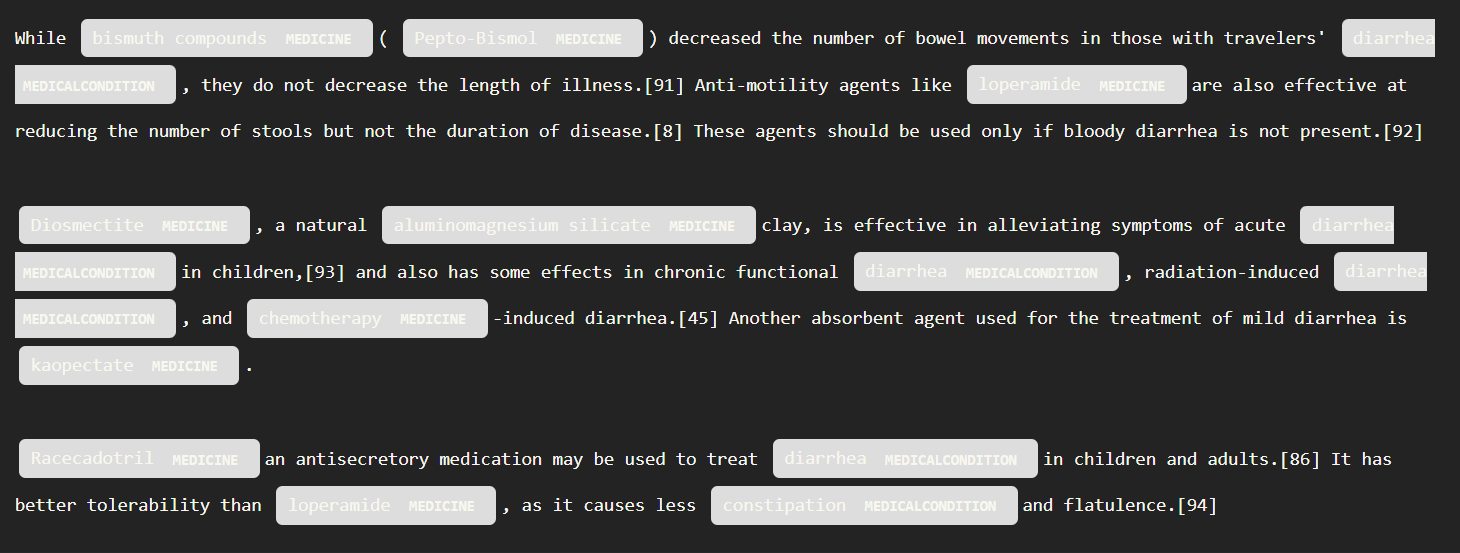

Even with the very limited amount of data the model achieves decent performance. We could follow the same steps above to train a model with different data but it should have annotations. 